Módulos Python
==============

![04 dependencias modulos.png](<attachment:04 dependencias modulos.png>)

### Creación módulos
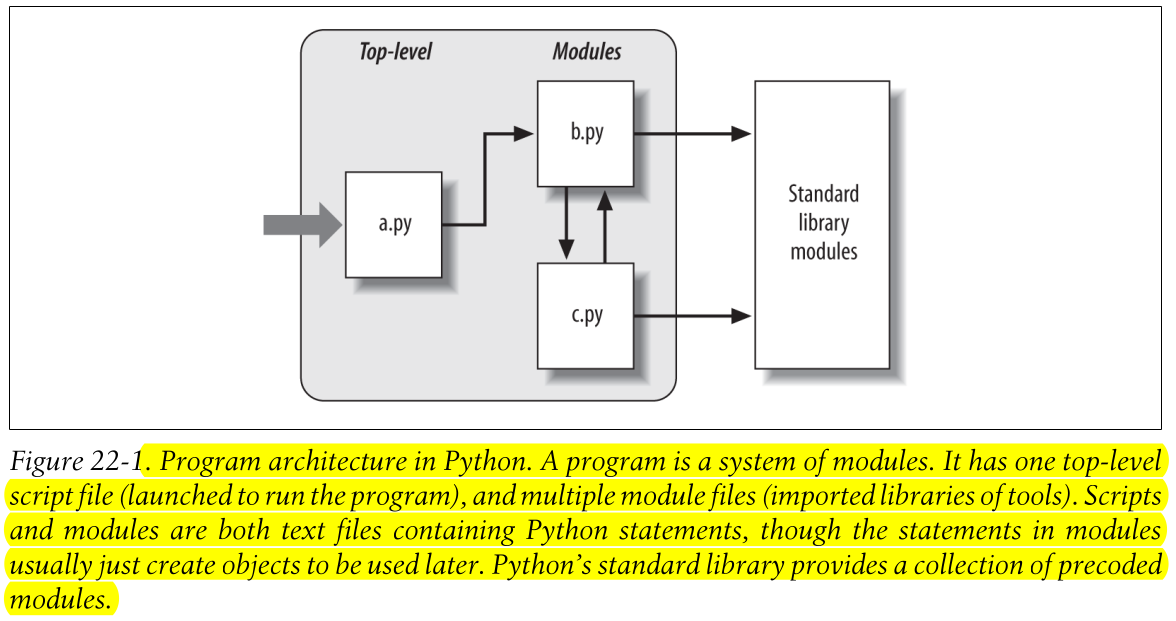

In [1]:
def printer(x):     
    print(x)

## Uso de módulos

Para modulo utilizar import o from, import carga el modulo completo y from carga nombres específicos del módulo.

### sys.path

Para búsqueda de módulos utilizar ruta mediante sys.path.



In [2]:
import sys
sys.path.append('..')

### Sentencia import

El nombre del módulo se convierte en variable. import para cargar uno o más módulos.

In [3]:
import src.modulo as modulo                      
modulo.printer("Hello world!")                  

Hello world!


### Sentencia from

`from` copia nombres de un fichero.

In [4]:
from src.modulo import printer      
printer('Hello world!')             

Hello world!


### Sentencia from *

Con * se consigue copias de todos los nombres del ámbito global del módulo.

In [5]:
from src.modulo import *      
printer('Hello world!')

Hello world!


### Sólo se importa una vez

Solo se ejecuta una operación por fichero. 

Las importaciones restantes referencian un objeto ya cargado.

```python
# modulo_simple
print("modulo simple")
spam = 1
```

In [6]:
import src.modulo_simple as simple   

modulo simple


### import y from son asignaciones

Como def, import y from son sentencias ejecutables.

- Pueden usarse en sentencias  if y try. 

### Cambiando mutables en modulos

In [10]:
x = 1
y = [1, 2]

In [11]:
from src.modulo_small import x, y      
x = 42                                 
y[0] = 42                              
x, y

(42, [42, 2])

Y es un objeto compartido mutable, x no:

In [12]:
import src.modulo_small as small    
small.x                             

small.x, small.y                    


(1, [42, 2])

#### Cambios de nombres entre ficheros

In [13]:
from src.modulo_small import x, y      
x = 42                                  
import src.modulo_small as small        
x, small.x                          

(42, 1)

In [14]:
importlib.reload(small)

<module 'src.modulo_small' from '/home/davidg/Escritorio/codigo/python-fundamentals-nb/notebooks/../src/modulo_small.py'>

### When import is required

The only time you really must use ``import`` instead of ``from`` is when you must use the same name defined in two different modules.

```py

def func():
...do something...


def func():
...do something else...
```

```py

from M import func  
from N import func  
```

```py
import M, N        
M.func()           
N.func()                      
```

### Namespace Dictionaries: __dict__

In [16]:
list(small.__dict__.keys())

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__file__',
 '__cached__',
 '__builtins__',
 'x',
 'y']

In [17]:
list(name for name in small.__dict__.keys() if not name.startswith('__'))

['x', 'y']

## Mixed Usage Modes: __name__ and __main__

__name__ en un módulo es un atributo incorporado 

Cuando el archivo se ejecuta directamente como el programa principal, el valor de __name__ será __main__.
Pero si el archivo se importa como un módulo, __name__ tomará el nombre del módulo.

En conclusion, sire para comprobar si el archivo es importado o no.

```py
def tester():
    print("It's Christmas in Heaven...")    
if __name__ == '__main__':                  
    tester()                                
